In [62]:
# Importo librerias necesarias para el analisis de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Formateo para que los float tengan 2 decimales
pd.options.display.float_format='{:.2f}'.format

In [3]:
df = pd.read_csv('mcdonaldata.csv')
df

,Unnamed: 0,item,servesize,calories,protien,totalfat,satfat,transfat,cholestrol,carbs,sugar,addedsugar,sodium,menu
0,0,McVeggie Burger,168,402,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,regular
1,1,McAloo Tikki Burger,146,339,8.50,11.31,4.27,0.20,1.47,5.27,7.05,4.07,545.34,regular
2,2,McSpicy Paneer Burger,199,652,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,regular
3,3,Spicy Paneer Wrap,250,674,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,regular
4,4,American Veg Burger,177,512,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,regular
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,136,Tomato Ketchup Sachets,8,11.23,0.08,23.45,0.38,0.25,0.08,2.63,2.33,1.64,414.71,condiments
137,137,Maple Syrup,3,86.4,0.00,0.00,0.00,0.40,0.30,21.60,16.20,5.34,71.05,condiments
138,138,Cheese Slice,14,51.03,3.06,3.99,0.00,0.00,13.43,0.72,0.54,0.00,15.00,condiments
139,139,Sweet Corn,40,45.08,1.47,1.00,2.89,0.01,2.00,7.55,2.54,0.00,178.95,condiments


In [7]:
# Tamaño del dataframe
df.shape

(141, 14)

In [22]:
# Tipo de dato de cada variable
df.dtypes

item           object
servesize      object
calories       object
protien       float64
totalfat      float64
satfat        float64
transfat      float64
cholestrol    float64
carbs         float64
sugar         float64
addedsugar    float64
sodium        float64
menu           object
dtype: object

In [54]:
df['calories'] = df['calories'].astype(float)

In [13]:
# Borro la columna que no necesito
df.drop(columns='Unnamed: 0', inplace=True)

In [4]:
# Busco valores faltantes, nulos o repetidos para hacer limpieza de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  141 non-null    int64  
 1   item        141 non-null    object 
 2   servesize   141 non-null    object 
 3   calories    141 non-null    object 
 4   protien     141 non-null    float64
 5   totalfat    141 non-null    float64
 6   satfat      141 non-null    float64
 7   transfat    141 non-null    float64
 8   cholestrol  141 non-null    float64
 9   carbs       141 non-null    float64
 10  sugar       141 non-null    float64
 11  addedsugar  141 non-null    float64
 12  sodium      141 non-null    float64
 13  menu        141 non-null    object 
dtypes: float64(9), int64(1), object(4)
memory usage: 15.6+ KB


In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

item          0
servesize     0
calories      0
protien       0
totalfat      0
satfat        0
transfat      0
cholestrol    0
carbs         0
sugar         0
addedsugar    0
sodium        0
menu          0
dtype: int64

# EDA

In [19]:
df.columns

Index(['item', 'servesize', 'calories', 'protien', 'totalfat', 'satfat',
       'transfat', 'cholestrol', 'carbs', 'sugar', 'addedsugar', 'sodium',
       'menu'],
      dtype='object')

In [56]:
# Los 10 productos con mas calorias
df_top10calories = df[['item', 'calories']].head(10)

In [57]:
df_top10calories

,item,calories
0,McVeggie Burger,402.00
1,McAloo Tikki Burger,339.00
2,McSpicy Paneer Burger,652.00
3,Spicy Paneer Wrap,674.00
4,American Veg Burger,512.00
5,Veg Maharaja Mac,832.00
6,Green Chilli Aloo Naan p,356.00
7,Pizza Puff,228.00
8,Mc chicken Burger,400.00
9,FILLET-O-FISH Burger,348.00


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'McVeggie Burger'),
  Text(1, 0, 'McAloo Tikki Burger'),
  Text(2, 0, 'McSpicy\x99 Paneer Burger'),
  Text(3, 0, 'Spicy Paneer Wrap'),
  Text(4, 0, 'American Veg Burger'),
  Text(5, 0, 'Veg Maharaja Mac\xa0'),
  Text(6, 0, 'Green Chilli Aloo Naan p'),
  Text(7, 0, 'Pizza Puff\xa0'),
  Text(8, 0, 'Mc chicken Burger\xa0'),
  Text(9, 0, 'FILLET-O-FISH Burger\xa0')])

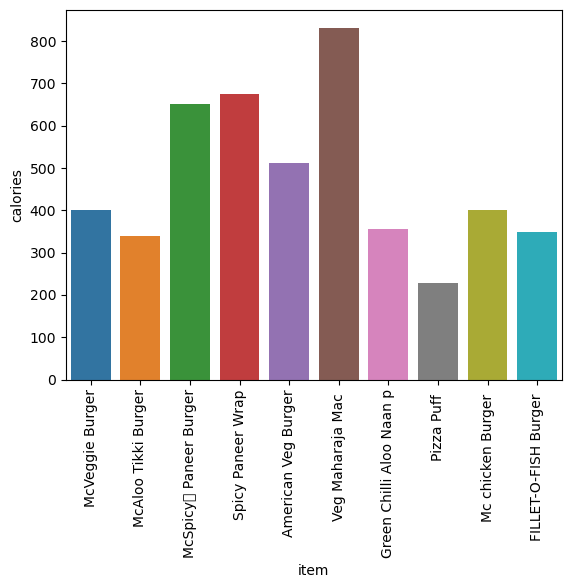

In [66]:
sns.barplot(x=('item'),y=('calories'),data=df_top10calories)
plt.xticks(rotation=90)
